D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


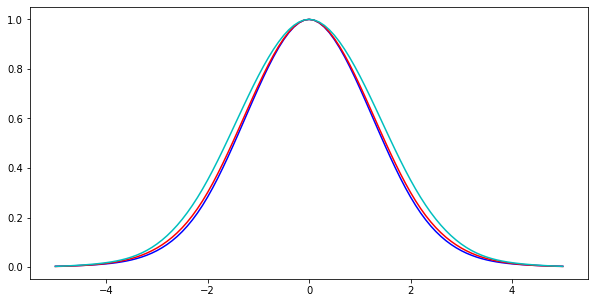

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import pandas as pd

data=pd.read_csv("data_addition.csv")
r=data['r'].astype("float")
s1=data['S1'].astype("float")
s2=data['S2'].astype("float")
s3=data['S3'].astype("float")

fig=plt.figure(figsize=[10,5])
ax=fig.add_subplot(111)
ax.plot(r,s1,'-b')
ax.plot(r,s2,'-r')
ax.plot(r,s3,'-c')
fig.show()

1.7277669825204702
1.7277702069119998


D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


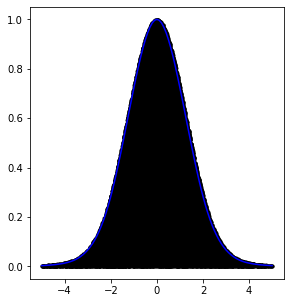

In [2]:
def nu2():
    a=0
    for k in range(N):
        a=a+x[k]**2
    nu2=a/N
    return nu2


def p(nu2,sigma2):
    logp=-N/2*np.log(sigma2)-N*nu2/2/sigma2
    p=np.exp(logp-np.mean(logp))
    #p=sigma2**(-N/2)*np.exp(-N*nu2/2/sigma2)
    return p

#对第一颗星拒绝采样
N=50000
i=0
x=np.zeros(N)
y=np.zeros(N)

while i<N:
    x0=np.random.uniform(np.min(r),np.max(r))
    y0=np.random.uniform(0.,np.max(s1))
    y1=np.interp(x0,r,s1)
    if y0<y1:
        y[i]=y0
        x[i]=x0
        i=i+1

print(np.var(x))

fig=plt.figure(figsize=[10,5])
ax=fig.add_subplot(121)
ax.plot(x,y,'.k')
ax.plot(r,s1,'-b')
fig.show()
nu2_s1=nu2()
print(nu2_s1)

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


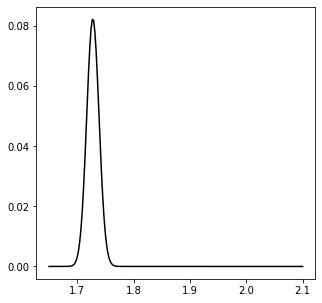

In [13]:
#第一颗星方差的似然
sigma2_1=np.linspace(1.65,2.1,200)
p_s1=p(nu2_s1,sigma2_1)
fig=plt.figure(figsize=[5,5])
ax=fig.add_subplot(111)
ax.plot(sigma2_1,p_s1/np.sum(p_s1),'k-')
fig.show()

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


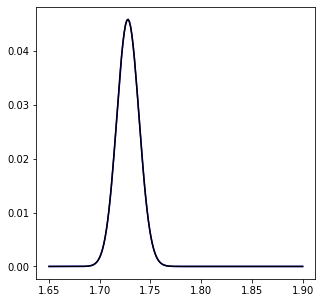

In [4]:
#与无信息的先验分布相乘，得到第一颗星方差的后验分布
p0=1/sigma2_1
p1=p0*p_s1
fig=plt.figure(figsize=[5,5])
ax=fig.add_subplot(111)
ax.plot(sigma2_1,p_s1/np.sum(p_s1),'b-')
ax.plot(sigma2_1,p1/np.sum(p1),'k-')
fig.show()

1.8028455112362194
1.802928336689517


D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


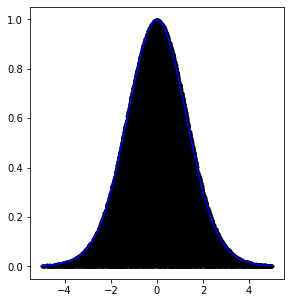

In [6]:
#对第二颗星拒绝采样
i=0
x=np.zeros(N)
y=np.zeros(N)

while i<N:
    x0=np.random.uniform(np.min(r),np.max(r))
    y0=np.random.uniform(0.,np.max(s2))
    y1=np.interp(x0,r,s2)
    if y0<y1:
        y[i]=y0
        x[i]=x0
        i=i+1

print(np.var(x))

fig=plt.figure(figsize=[10,5])
ax=fig.add_subplot(121)
ax.plot(x,y,'.k')
ax.plot(r,s2,'-b')
fig.show()
nu2_s2=nu2()
print(nu2_s2)

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


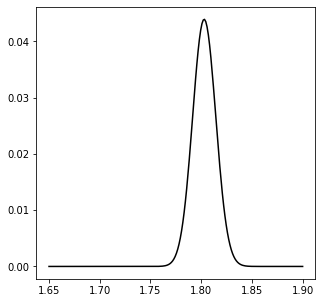

In [7]:
#第二颗星方差的似然
p_s2=p(nu2_s2,sigma2_1)
fig=plt.figure(figsize=[5,5])
ax=fig.add_subplot(111)
ax.plot(sigma2_1,p_s2/np.sum(p_s2),'k-')
fig.show()

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


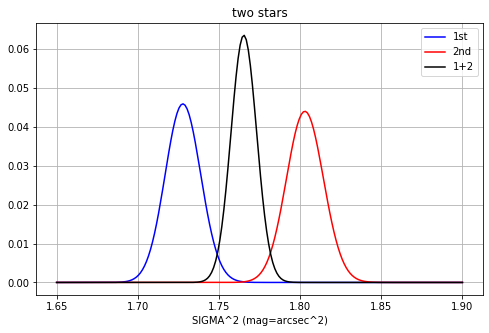

In [8]:
#将第一颗星方差的后验分布作为先验分布，得到第二颗星方差的后验分布
p2=p1*p_s2
fig=plt.figure(figsize=[8,5])
ax=fig.add_subplot(111)
ax.plot(sigma2_1,p_s1/np.sum(p_s1),'b-',label='1st')
ax.plot(sigma2_1,p_s2/np.sum(p_s2),'r-',label='2nd')
ax.plot(sigma2_1,p2/np.sum(p2),'k-',label='1+2')
ax.legend(loc = 'upper right')
ax.set_title('two stars')
ax.set_xlabel("SIGMA^2 (mag=arcsec^2)")
ax.grid(True)
fig.show()

1.9227530229515033
1.9229237083018618


D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


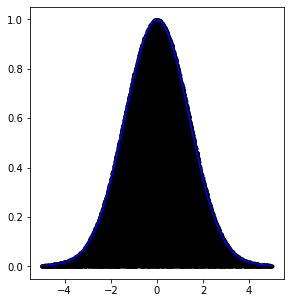

In [9]:
#对第三颗星拒绝采样
i=0
x=np.zeros(N)
y=np.zeros(N)

while i<N:
    x0=np.random.uniform(np.min(r),np.max(r))
    y0=np.random.uniform(0.,np.max(s3))
    y1=np.interp(x0,r,s3)
    if y0<y1:
        y[i]=y0
        x[i]=x0
        i=i+1

print(np.var(x))

fig=plt.figure(figsize=[10,5])
ax=fig.add_subplot(121)
ax.plot(x,y,'.k')
ax.plot(r,s3,'-b')
fig.show()
nu2_s3=nu2()
print(nu2_s3)

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


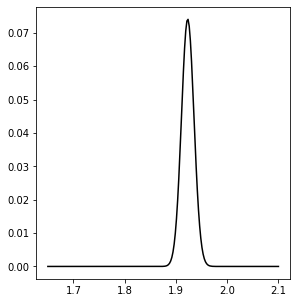

In [14]:
#第三颗星方差的似然
p_s3=p(nu2_s3,sigma2_1)
fig=plt.figure(figsize=[10,5])
ax=fig.add_subplot(122)
ax.plot(sigma2_1,p_s3/np.sum(p_s3),'k-')
fig.show()

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


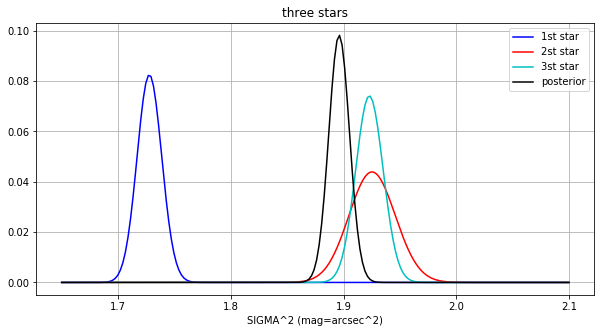

In [16]:
#将第二颗星方差的后验分布作为先验分布，得到第三颗星方差的后验分布
p3=p2*p_s3
fig=plt.figure(figsize=[10,5])
ax=fig.add_subplot(111)
ax.plot(sigma2_1,p_s1/np.sum(p_s1),'b-',label='1st star')
ax.plot(sigma2_1,p_s2/np.sum(p_s2),'r-',label='2st star')
ax.plot(sigma2_1,p_s3/np.sum(p_s3),'c-',label='3st star')
ax.plot(sigma2_1,p3/np.sum(p3),'k-',label='posterior')
ax.set_title('three stars')
ax.legend(loc = 'upper right')
ax.set_xlabel("SIGMA^2 (mag=arcsec^2)")
ax.grid(True)
fig.show()

最大可几值位置= (array([99], dtype=int64),)
FWHM最大可几值= [3.17487437]
FWHM期望= 3.174985810284776


D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


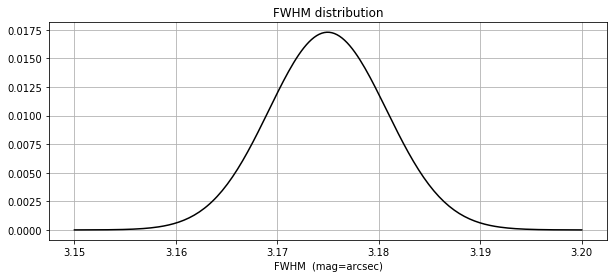

In [12]:
#由方差的分布计算半高全宽的分布
FWHM=np.linspace(3.15,3.20,200)
sigma2_2=FWHM**2/8/np.log(2)
f_sigma2=p(nu2_s1,sigma2_2)*p(nu2_s2,sigma2_2)*p(nu2_s3,sigma2_2)/sigma2_2
f_FWHM=f_sigma2*FWHM/4/np.log(2)

#获取FWHH的最可几位置
y_max=np.where(f_FWHM==np.max(f_FWHM))
print("最大可几值位置=",y_max)
x_max=FWHM[y_max]
print("FWHM最大可几值=",x_max)
exp_FWHM=sum(FWHM*f_FWHM)/sum(f_FWHM)
print("FWHM期望=",exp_FWHM)

fig=plt.figure(figsize=[10,4])
ax=fig.add_subplot(111)
ax.plot(FWHM,f_FWHM/np.sum(f_FWHM),'k-')
ax.set_title('FWHM distribution')
ax.set_xlabel("FWHM  (mag=arcsec)")
ax.grid(True)

fig.show()